In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("age_gender.csv")
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [5]:
df = data.drop('img_name', axis=1)
df.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
def basic_eda(df):
    print("\n Shape: ")
    print(df.shape)
    print("\n\n --------- ")
    print("\n Number of null values: ")
    print(df.isnull().sum())
    print("\n\n --------- ")
    print("\n Value count of age: ")
    print(df['age'].value_counts())
    print("\n\n --------- ")
    print("\n Value count of ethnicity: ")
    print(df['ethnicity'].value_counts())
    print("\n\n --------- ")
    print("\n Value count of gender: ")
    print(df['gender'].value_counts())

In [7]:
basic_eda(df)


 Shape: 
(23705, 4)


 --------- 

 Number of null values: 
age          0
ethnicity    0
gender       0
pixels       0
dtype: int64


 --------- 

 Value count of age: 
26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
91        2
101       2
103       1
111       1
Name: age, Length: 104, dtype: int64


 --------- 

 Value count of ethnicity: 
0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64


 --------- 

 Value count of gender: 
0    12391
1    11314
Name: gender, dtype: int64


In [8]:
columns = ["age", "gender",]
y = df.drop("pixels", axis=1)
X = df.drop(columns, axis=1)

In [9]:
X.head()

,ethnicity,pixels
0,2,129 128 128 126 127 130 133 135 139 142 145 14...
1,2,164 74 111 168 169 171 175 182 184 188 193 199...
2,2,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,2,193 197 198 200 199 200 202 203 204 205 208 21...
4,2,202 205 209 210 209 209 210 211 212 214 218 21...


In [10]:
y.head()

,age,ethnicity,gender
0,1,2,0
1,1,2,0
2,1,2,0
3,1,2,0
4,1,2,0


In [11]:
y.nunique()

age          104
ethnicity      5
gender         2
dtype: int64

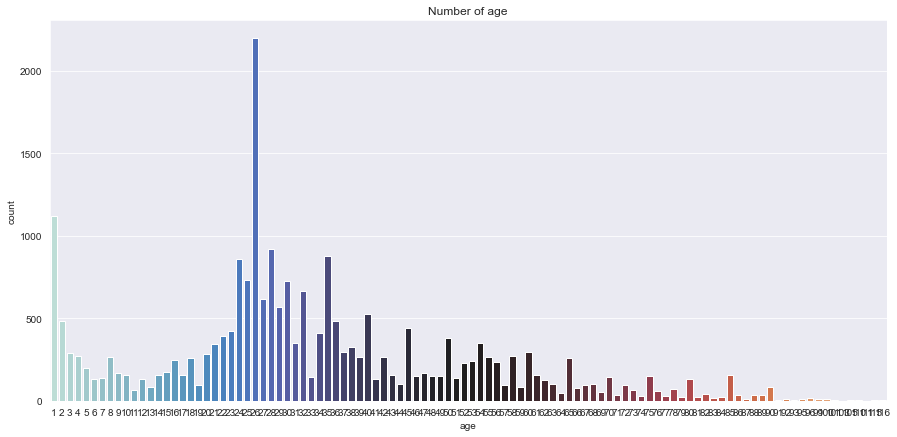

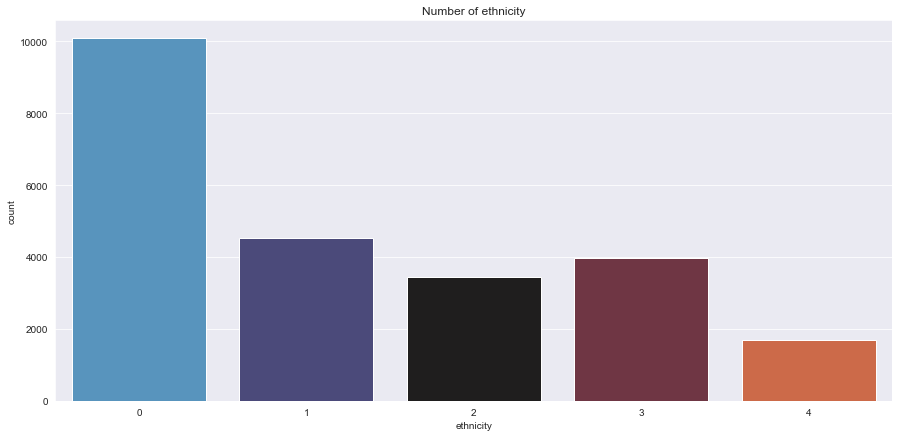

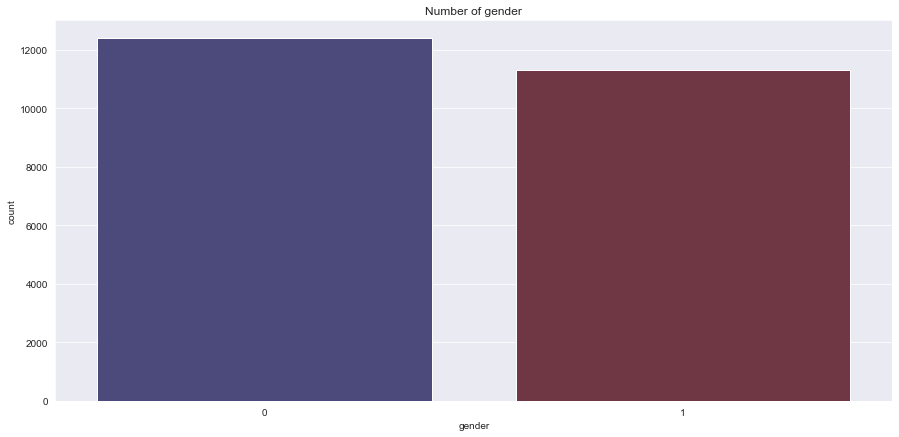

In [12]:
for i in y.columns:
    plt.figure(figsize=(15,7))
    g = sns.countplot(y[i], palette="icefire")
    plt.title("Number of {}".format(i))

Text(0.5, 1.0, 'Number of age')

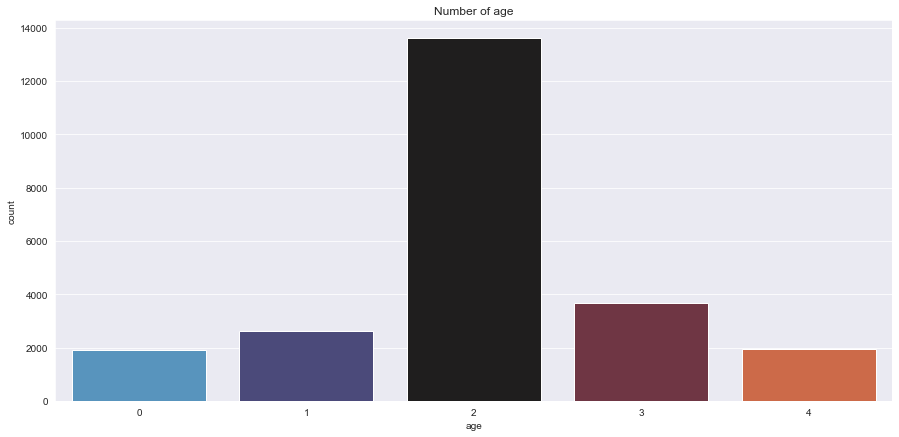

In [13]:
y["age"] = pd.cut(y["age"],bins=[0,3,18,45,64,116],labels=["0","1","2","3","4"])
plt.figure(figsize=(15,7))
g = sns.countplot(y["age"], palette="icefire")
plt.title("Number of age")

In [14]:
num_pixels = len(X['pixels'][0].split(" "))
img_height = int(np.sqrt(len(X['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(X['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)


2304 48 48


In [ ]:
X = pd.Series(X['pixels'])
X = X.apply(lambda x:x.split(' '))
X = X.apply(lambda x:np.array(list(map(lambda z:np.int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)

X = X.reshape(-1, 48, 48, 1)
print("X shape: ", X.shape)

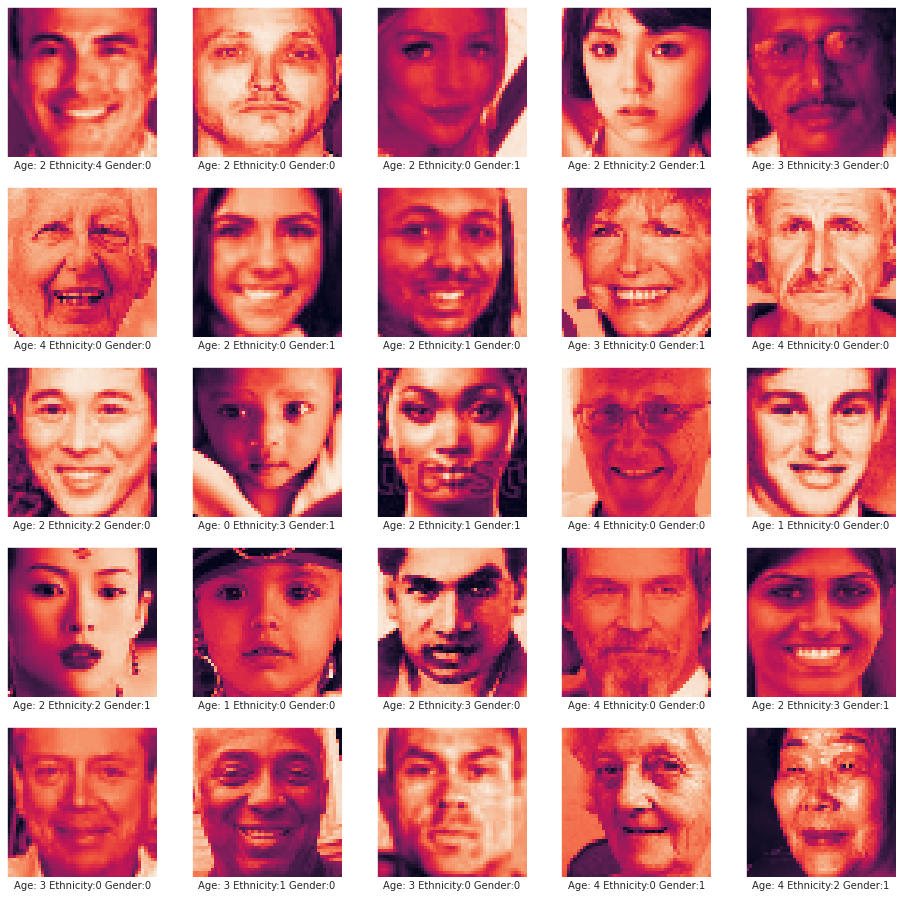

In [90]:
plt.figure(figsize=(16,16))
for i,a in zip(np.random.randint(0, 23705, 25), range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(
    "Age: "+str(y['age'].iloc[i])+
    " Ethnicity:"+str(y['ethnicity'].iloc[i])+
    " Gender:"+str(y['gender'].iloc[i]))
plt.show()

In [91]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import plotly.express as px
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy

In [92]:
age_matrix = np.array(y['age'])
gender_matrix = np.array(y['gender'])
age = to_categorical(age_matrix, num_classes = 5)
gender = to_categorical(y["gender"], num_classes = 2)
print(age, gender)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]] [[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [93]:
X = X / 255
X = X / 255

In [94]:
datagen = ImageDataGenerator(
        featurewise_center = False,
       samplewise_center = False,
       featurewise_std_normalization = False,
       samplewise_std_normalization=False,  
       zca_whitening=False,
       rotation_range=5, 
       zoom_range = 0.1,
       width_shift_range=0.1, 
       height_shift_range=0.1,  
       horizontal_flip=False,  
        vertical_flip=False  
)

datagen.fit(X)

In [95]:
from sklearn.model_selection import train_test_split


# Gender
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, gender, test_size=0.3, random_state=42)

# Age
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X, age, test_size=0.3, random_state=42)

In [96]:
print(X_train_gender.shape, X_train_age.shape)

(16593, 48, 48, 1) (16593, 48, 48, 1) (16593, 48, 48, 1)


In [97]:
def my_model(num_classes, activation, loss):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same", input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3,3),activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3,3),activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dense(num_classes, activation=activation))
    
    model.compile(optimizer='Adam',
              loss= loss,
              metrics=['accuracy'])
    return model

In [98]:
early_stopping = EarlyStopping(patience=10, 
                               min_delta=0.001,
                               restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                           patience = 2,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr = 0.00001)

In [99]:
epochs = 500  
batch_size = 64
model_ethnicity = my_model(5,"softmax",'categorical_crossentropy')
history_ethnicity = model_ethnicity.fit(X_train_ethnicity, y_train_ethnicity, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test_ethnicity,y_test_ethnicity), steps_per_epoch= X_train_ethnicity.shape[0] // batch_size, callbacks= [early_stopping, learning_rate_reduction])

Epoch 1/500
259/259 [==============================] - 3s 11ms/step - loss: 1.1850 - accuracy: 0.5685 - val_loss: 4.8719 - val_accuracy: 0.0709
Epoch 2/500
259/259 [==============================] - 2s 9ms/step - loss: 0.8716 - accuracy: 0.6873 - val_loss: 3.8415 - val_accuracy: 0.4318
Epoch 3/500
259/259 [==============================] - 2s 9ms/step - loss: 0.7733 - accuracy: 0.7224 - val_loss: 0.8946 - val_accuracy: 0.6781
Epoch 4/500
259/259 [==============================] - 2s 9ms/step - loss: 0.7179 - accuracy: 0.7458 - val_loss: 0.7891 - val_accuracy: 0.7271
Epoch 5/500
259/259 [==============================] - 2s 10ms/step - loss: 0.6723 - accuracy: 0.7618 - val_loss: 0.9805 - val_accuracy: 0.6600
Epoch 6/500
259/259 [==============================] - 2s 9ms/step - loss: 0.6357 - accuracy: 0.7714 - val_loss: 0.7771 - val_accuracy: 0.7274
Epoch 7/500
259/259 [==============================] - 2s 9ms/step - loss: 0.5919 - accuracy: 0.7893 - val_loss: 0.7400 - val_accuracy: 0.74

In [100]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [102]:
loss, acc = model_ethnicity.evaluate(X_test_ethnicity, y_test_ethnicity, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.7248516082763672
Test Accuracy: 0.7573115825653076


In [103]:
model_age = my_model(5,"softmax",'categorical_crossentropy')
history_age = model_age.fit(X_train_age, y_train_age, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test_age,y_test_age), 
                            steps_per_epoch= X_train_age.shape[0] // batch_size, 
                            callbacks= [early_stopping, 
                            learning_rate_reduction])

Epoch 1/500
259/259 [==============================] - 3s 10ms/step - loss: 0.9464 - accuracy: 0.6578 - val_loss: 3.0253 - val_accuracy: 0.0828
Epoch 2/500
259/259 [==============================] - 2s 10ms/step - loss: 0.6920 - accuracy: 0.7276 - val_loss: 8.5981 - val_accuracy: 0.0828
Epoch 3/500
259/259 [==============================] - 3s 10ms/step - loss: 0.6278 - accuracy: 0.7518 - val_loss: 1.5234 - val_accuracy: 0.4144
Epoch 4/500
259/259 [==============================] - 2s 9ms/step - loss: 0.5910 - accuracy: 0.7670 - val_loss: 0.7542 - val_accuracy: 0.7293
Epoch 5/500
259/259 [==============================] - 3s 10ms/step - loss: 0.5523 - accuracy: 0.7812 - val_loss: 0.7447 - val_accuracy: 0.7295
Epoch 6/500
259/259 [==============================] - 2s 10ms/step - loss: 0.5310 - accuracy: 0.7892 - val_loss: 2.3878 - val_accuracy: 0.6497
Epoch 7/500
259/259 [==============================] - 2s 9ms/step - loss: 0.5005 - accuracy: 0.8026 - val_loss: 0.9722 - val_accuracy: 0

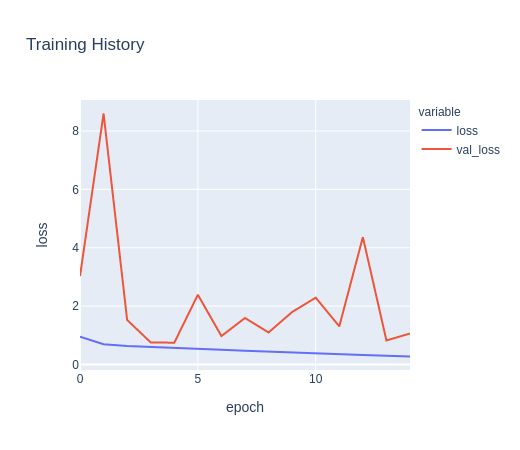

In [104]:
fig = px.line(
    history_age.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [105]:
loss, acc = model_age.evaluate(X_test_age, y_test_age, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.7446830868721008
Test Accuracy: 0.7294713258743286


In [106]:
model_gender = my_model(2, "sigmoid", "binary_crossentropy")
history_gender = model_gender.fit(X_train_gender, y_train_gender, 
                                 batch_size = batch_size,
                                 epochs = epochs,
                                 validation_data = (X_test_gender, y_test_gender),
                                 steps_per_epoch = X_train_gender.shape[0] // batch_size, callbacks=[early_stopping,learning_rate_reduction])


Epoch 1/500
259/259 [==============================] - 3s 10ms/step - loss: 0.5152 - accuracy: 0.7539 - val_loss: 0.7787 - val_accuracy: 0.5352
Epoch 2/500
259/259 [==============================] - 2s 9ms/step - loss: 0.3582 - accuracy: 0.8342 - val_loss: 0.9382 - val_accuracy: 0.8228
Epoch 3/500
259/259 [==============================] - 3s 10ms/step - loss: 0.3165 - accuracy: 0.8602 - val_loss: 0.3568 - val_accuracy: 0.8451
Epoch 4/500
259/259 [==============================] - 2s 9ms/step - loss: 0.2984 - accuracy: 0.8671 - val_loss: 0.3159 - val_accuracy: 0.8600
Epoch 5/500
259/259 [==============================] - 2s 9ms/step - loss: 0.2713 - accuracy: 0.8822 - val_loss: 0.2868 - val_accuracy: 0.8746
Epoch 6/500
259/259 [==============================] - 2s 9ms/step - loss: 0.2493 - accuracy: 0.8927 - val_loss: 0.2804 - val_accuracy: 0.8841
Epoch 7/500
259/259 [==============================] - 2s 9ms/step - loss: 0.2349 - accuracy: 0.8998 - val_loss: 0.2849 - val_accuracy: 0.87

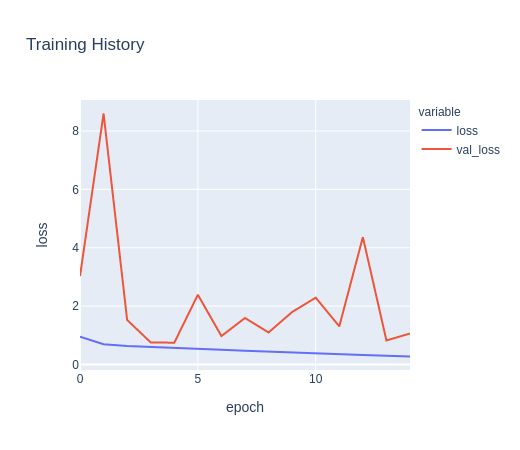

In [107]:
fx = px.line(
    history_gender.history, y=["loss", "val_loss"],
    labels = {'index':'epoch', 'value':'loss'},
    title = 'Training History')

fig.show()

In [108]:
loss, acc = model_gender.evaluate(X_test_gender, y_test_gender, verbose=0)
print("Test loss: {}".format(loss))
print("Test Accuracy: {}".format(acc))

Test loss: 0.26366934180259705
Test Accuracy: 0.8911698460578918
